In [3]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
import keras
from keras.models import load_model
from keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
!pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Using cached scikit_learn-0.22.1-cp36-cp36m-win_amd64.whl (6.3 MB)


In [5]:
data = pd.read_csv("./editor_news.csv")

In [6]:
data = data[data["c1"].isnull()]
data = data[['content','title','category']]
data = data.reset_index(drop=True)
data.shape

(2915, 3)

In [7]:
filt= ['https://u.today/tron-ceo-justin-sun-gets-his-account-closed-by-bank-of-america-after-paypals-roelof-botha',
       '0',
       'Binance Chief CZ Looks to Bolster Exchange Liquidity with 180 Fiat Currencies in the Pipeline ',
       'yet institutions are hesitant to enter the market due to perceived risk and some don\'t even realize the exposure that they already have to cryptocurrency." (CJ)"',
       'https://cointelegraph.com/news/lightning-network-will-drive-bitcoin-to-250-000-by-2023-tim-draper',
       'Grin Scores 50 BTC Donation From Anonymous Party, Charlie Lee Jokes It Was Satoshi Nakamoto ',
       'https://www.theblockcrypto.com/linked/46952/binance-plans-to-support-all-180-currencies-for-its-direct-fiat-to-crypto-trading-facility?utm_source=cryptopanic&utm_medium=rss',
       'assets',
       'and sovereign currency. The report also examines stablecoins including Tether',
       'publishing a chart of the bitcoin price and saying: "After a few nasty wicks $BTC looks good again for a move up towards 9k+. [I] would want this most recent wick down to be the low for that idea to be valid. Wrong below." (CJ)"',
       'BTC,GET',
       'https://decrypt.co/11352/bitcoin-makes-front-page-news-in-china?&utm_source=feed&utm_medium=Feed',
       'https://www.theblockcrypto.com/linked/46611/stripe-ceo-patrick-collison-very-skeptical-about-cryptocurrencies?utm_source=cryptopanic&utm_medium=rss',
       'Binance Now Supports Nearly Half-a-Dozen Fiat Gateways ',
       ' for crypto EUR', 'as Berminal previously reported. Meanwhile',
       'BTC,LINK', 'saying: "We can go lower sure',
       'https://twitter.com/APompliano/status/1193260174573789184', 'EOS',
       'Monero Community Cheers Devs amid Release of Carbon Chamaeleon and Ahead of Hard Fork ',
       'https://www.fintechfestival.sg/speakers',
       'https://twitter.com/PeterSchiff/status/1193336575624712192',
       'https://www.reddit.com/r/Bitcoin/comments/du5zpz/6_yrs_ago_a_student_also_held_up_a_qr_on_college/',
       'https://news.bitcoin.com/corrupt-cbi-officer-booked-for-extorting-vigilante-bitcoiner/',
       'for his negativity on the matter. Bitcoin is currently trading at $8',
       'sliding down a 50-foot razor blade into a bathtub of gin',
       'https://cointelegraph.com/news/are-bitcoin-and-other-cryptos-back-in-a-bear-market-after-latest-drop',
       'https://www.reddit.com/r/Bitcoin/comments/dtid99/george_soros_on_bitcoin/',
       'Nope. (CJ)"',
       'https://cointelegraph.com/news/tether-supports-peter-mccormacks-defense-against-craig-wright',
       'which actually has already been burned',
       'https://twitter.com/cz_binance/status/1192488245877039105',
       'Bitcoin Price at Risk of Slipping Below $9K Based on Technical Signals ',
       'BTC', 'take some...profits',
       'Bullish Crypto Trader Predicts Bitcoin Price of $13,864 by Year-End ',
       'Illinois Lottery Winner Puts Half His Winnings Into Bitcoin',
       'English',
       'were disclosed to other users in small batches. No other information was disclosed." (CJ)"',
       'https://twitter.com/MatiGreenspan/status/1191273069425364992',
       'https://twitter.com/stephendpalley/status/1191004838898917376',
       'Pomp Says Bitcoin Will Make Anyone a Bank, and Reddit Members Respond ',
       'GET,ETH',
       'John McAfee Announces His Crypto DEX to Integrate Tron Blockchain Next Week ',
       'https://twitter.com/latokens/status/1190586501182173185',
       'your coins. Get used to it." (CJ)"',
       'Ethereum Co-Founder Joseph Lubin Compares Blockchain to iPhone ',
       'https://www.thedailychain.com/santiment-analysis-why-are-link-and-bat-successfully-decoupling-from-bitcoin/',
       'https://medium.com/myetherwallet/mew-cx-the-web3-wallet-that-puts-the-user-in-full-control-90452755b4',
       'saying: "CME $BTC futures contract was poorly designed and implemented. Many reasons not to trade CME Bitcoin. As of this writing',
       '079 level. Yesterday eToro revealed that it was expanding its CopyTrading feature into the U.S. (CJ)"',
       'https://medium.com/@coinlist/helping-those-creating-the-crypto-future-799cabacd894',
       'REP,GET,WAN',
       ' according to Blockstack CEO Muneeb Ali quoted in The Block. (CJ)',
       'RED,ETH,BNB,BTC', 'and angel investors." (CJ)"',
       'all of which similarly support margin trading. (CJ)"',
       '000 sats being sent to Donald Trump for a balance of $9.64. According to Bitcoin Wiki: "The satoshi is currently the smallest unit of the bitcoin currency recorded on the blockchain.[1] It is a one hundred millionth of a single bitcoin (0.00000001 BTC)." (CJ)"',
       'BTC,SINS,GET',
       'So I\'m really just guessing, but OP might be using XMR/Bitcoin to store his wealth (working as bank account) and using cash for his day to day expenses. With a reliable exchange he can go from crypto to cash with ease. C(J)"',
       'MEME,BTC,NEO', '000 participants. (CJ)"', 'XMR',
       'which is a new record and indicates that big investors are starting to come off the sidelines and into BTC. (CJ)"',
       'Bitcoin Price Finds Green, Leads Broader Crypto Market Higher ',
       'Crypto Capital Chief Arrested by Polish Authorities for Alleged Money Laundering Scam ',
       'https://twitter.com/alexeheath/status/1187463879850418176',
       "Mike Novogratz Reveals New Bitcoin Fund, Says with 'New Energy' BTC Price Could Push Through to $8,200 ",
       '000 is good. The last couple of weeks', 'and more. (CJ) "', 'LTC',
       'why not work on contributing to something where thousands of people are already making progress?" (CJ) "',
       '1',
       'Bitcoin Volatility Hovers at Multi-Month Low as Technical Set-Up Suggests Short-Term Gains Ahead ',
       'BBC,DIME',
       'https://twitter.com/barrysilbert/status/1186795886258450432',
       'https://www.theblockcrypto.com/linked/44119/crypto-exchange-bittrex-moving-headquarters-from-malta-to-liechtenstein?utm_source=rss&utm_medium=rss&utm_campaign=default',
       'is testing IOTA reward program for sharing vehicle data. (VS)"',
       'https://blog.latoken.com/latoken-lists-tezos-with-600m-market-cap-8f5e2da9c61e',
       'Canada or any sanctioned countries. (VS)',
       'there is no reason to look towards Blockchain. However',
       'BTC,KICK',
       'https://twitter.com/brian_armstrong/status/1183473591502934016',
       'remembers growing up having to use Western Union to send funds to relatives. Those experiences coupled with his journey as a professional football player including as the vice president NFL Players Association has driven him to bitcoin. He also had a negative experience trying to withdraw funds from his bank while he was traveling in Nigeria. (CJ)',
       'https://cc-forum.com/register/', 'not a replacement',
       'Mastercard', 'as Berminal previously reported', 'BNB,ETH',
       "DigiByte Founder to Unveil the 'Most In-Depth Book Ever Written About Blockchain' ",
       '$REP', 'Bitwise', 'DASH,ZEC',
       'https://www.ccn.com/bitcoin-bull-anthony-pompliano-roasted-twitter/',
       '583.22', "which bolster the network's scalability",
       'https://cointelegraph.com/news/grayscale-institutional-crypto-interest-doubles-in-q2',
       'NAV',
       'at which time ETF companies can say to the securities regulator',
       'Cryptocurrency Exchange Kraken Lists Siacoin (SC) in USD, EUR, XBT, and ETH Markets ',
       'https://www.youtube.com/watch?v=UlM1L5Yrg5M', 'EOS,NEO',
       "Chart Whisperer: 'Don't Stress About BTC' and 'Coming Months Should Be Good'",
       ',BTC',
       'https://twitter.com/brian_armstrong/status/1180186846824763392?ref_src=twsrc%5Etfw%7Ctwcamp%5Etweetembed%7Ctwterm%5E1180186846824763392&ref_url=https%3A%2F%2Fbitcoinist.com%2Fwill-the-us-launch-a-crypto-dollar-coinbase-ceo-ponders%2F',
       '000 in BNB for creating a tutorial video about how to trade on Binance Futures. (CJ) "',
       'it is permissioned and centralized." Litecoin shares much of its code with Bitcoin Core. (CJ) "',
       ' the report indicates. (CJ) ',
       'global penetration was at 5.8%, very close to the 6.2% reported at bitcoin’s 10-year mark, the blog states. There are roughly 80 million bitcoin users globally',
       'Crypto Exchange Bitfinex Readies Lawsuit amid Allegations of Crypto Market Manipulation Tied to Tether (USDT) Issuance ',
       'WIN,BNB,BTC', 'Kyber',
       'and 0x." Chainalysis plans to add support for nearly two dozen more coins in the coming months such as "XRP',
       'https://cc-forum.com/', 'AD,GET,BTC,ARM',
       'including digital virtual currencies such as ndau." (CJ) "',
       'which Charlie Lee modeled after Bitcoin Core code',
       'Mainstream Financial Firm Morningstar to Attach Ratings to Crypto Assets ',
       'USDC,LEND',
       'and "University of Malta - Masters in Blockchain and DLT Opening." Binance CEO Changpeng Zhao was scheduled to be there live but instead provided what appears to be a live-stream talk. (CJ)  "',
       'BCH and a trio of stablecoins. (CJ) "',
       'https://twitter.com/cz_binance/status/1179239072344227842',
       "and bitcoin are also in the clear based on the council's rating system. Maker",
       'has "tested such point-of-sale devices in Austria', 'PORTAL,DASH',
       ' the Foundation assured. (CJ) ', '000 likes and more than 106',
       'Electric Coin Company chief executive Zooko Wilcox does not appear to have responded. (CJ) "',
       'such as $BNB \\ #BEP2 integrations." These features also include: "UI/UX overhaul; ERC20 token integrations; BEP2 token integration; Stability enhancements; Coin/Token Additions include: Binance Coin (BNB) [and] Dai Stable Coin (DAI)." They add: "Soon',
       'stocks', 'XRP',
       'https://www.corescientific.com/news/core-scientific-completes-acquisition-stax-digital',
       'ZIL,QTUM',
       'https://beincrypto.com/john-mcafee-is-in-survival-mode-freedom-coin-cancelled/',
       'we are going to build a',
       'would be propelling bitcoin higher otherwise. (CJ) "',
       'in response to which Yusko stated: "All the indicators of the network and the network value are rising; the price of any asset fluctuates." (CJ) "',
       'but it did not have the anticipated effect of lifting the LTC price. (CJ) "',
       'QTUM',
       "Crypto Mom Feels 'Honored' to Be Adopted by Crypto Community, Calls on Regulator Peers to Be Less 'Paternalistic' ",
       'https://www.cryptoglobe.com/latest/2019/09/facebook-s-ceo-mark-zuckerberg-really-focused-on-ensuring-libra-s-launch-goes-well/',
       'KIN',
       'who according to his Twitter account is a principal at Smolinski Rosario Law',
       'USDC', '1747', 'BTC is down fractionally at $6', 'GO,VIA,BTC',
       '35', '67', '66', '48', '1027', '47', '49', '884',
       'https://www.cryptoglobe.com/latest/2018/11/tron-trx-founder-and-ceo-demonstrates-his-support-for-net-neutrality/',
       '54', '964', '40', '36',
       'XRP Developer Launches Mobile Payment Tool as Ripple Mocks Banking System',
       '95', '490',
       'https://cryptoslate.com/binance-ceo-asks-followers-to-help-nab-a-fraudster/',
       'https://twitter.com/LizClaman/status/1055990831314882560',
       'Twitter Meme Pairs Elon Musk and CZ of Binance',
       'https://cryptoslate.com/albania-planning-crypto-regulation-framework/',
       'https://bitcoinexchangeguide.com/canadas-bitvo-crypto-exchange-gives-xrp-and-ethereum-classic-etc-support/',
       'Ripple Partners with MoneyNetInt for Cross-Border Payments',
       'ETH,XRP', 'PAY,CRPT', '31', '434', '25', '311', '154', '481',
       'ETH',
       "Tron (TRX)'s Justin Sun Announces $1 Million Reward for Buterin – Roubini Debate",
       '8',
       'https://blog.circle.com/2018/10/15/usdc-volume-swells-as-market-seeks-more-transparent-and-compliant-usd-token/',
       '11', '342', '37', '185', '199',
       'IOST CEO Jimmy Zhong: Without Users, Boasting about High TPS Makes No Sense',
       'BCH,BTC', '38',
       'https://twitter.com/VitalikButerin/status/1050103887170957312',
       '30',
       'https://www.investorideas.com/news/2018/bitcoin/10102CoinCola.asp',
       'ZEN,BLOCK',
       'https://www.coindesk.com/theres-a-giant-bitcoin-rat-on-wall-street-and-its-staring-at-the-fed/',
       '20', '10', 'DASH,BTC', '260', '133', 'RDD', '17', '7', '137', '5',
       '143', '14',
       'Binance to Unlock and Move Some BNB Coins to Fix” Market Cap"',
       '381', '75',
       'http://www.21jingji.com/2018/9-20/2MMDEzODBfMTQ1MDA2Mg.html',
       "Zimbabwe's Newly Appointed Finance Minister Aims to Establish a Cryptocurrency Unit",
       'saying "the global share of domestic virtual currency transactions has dropped from the initial 90% to less than 5%..." Although the ban',
       '213', 'SAN,LTC,XMR,DCR',
       'Decentralized Exchange BitShares Tops Blockchain Activity Leaderboard']

In [8]:
data = data.drop([i for i,x in enumerate(data.category) if x in filt ])
data.shape

(2828, 3)

In [9]:
data = data.reset_index(drop=True)
data.tail(5)

,content,title,category
2823,After Bloomberg published a report saying ther...,I’m not sure that market manipulations are rel...,featured
2824,Colorado regulators have identified a trio of ...,Colorado Regulators Uncover a Trio of Suspici...,featured
2825,Hong Kong’s first decentralized cryptocurrency...,Hong Kong’s First Decentralized Cryptocurrency...,featured
2826,"FuzeX card, which will be launching in the las...",FuzeX Joins Forces with Dash to Bolster its Ma...,featured
2827,CoolWallet S has announced its collaboration w...,Bitcoinist Partners with CoolWallet S,featured


In [10]:
data["category"].unique()

array(['regulation,blockchain,featured', 'regulation,featured',
       'featured', 'headline,price,featured',
       'price,headline,blockchain,featured', 'price,regulation,featured',
       'price,featured', 'price,blockchain,featured',
       'headline,regulation,featured', 'blockchain,regulation,featured',
       'blockchain,featured', 'regulation,featured,headline',
       'price,regulation,blockchain,featured', 'price,headline,featured',
       'regulation,headline,featured', 'featured,regulation,blockchain',
       'featured,blockchain', 'blockchain,featured,headline',
       'featured,price', 'blockchain,featured,price',
       'headline,featured,blockchain', 'featured,regulation',
       'headline,featured', 'featured,price,headline',
       'featured,blockchain,price,regulation',
       'price,featured,blockchain',
       'blockchain,headline,featured,regulation',
       'blockchain,featured,price,regulation',
       'featured,blockchain,headline,price',
       'headline,block

In [11]:
data.category[data.category.isnull()] = " "

In [12]:
data["blockchain"] = (data["category"].str.contains("blockchain")).astype("int")
data["regulation"] = (data["category"].str.contains("regulation")).astype("int")
data["price"] = (data["category"].str.contains("price")).astype("int")
data["featured"] = (data["category"].str.contains("featured")).astype("int")
data["headline"] = (data["category"].str.contains("headline")).astype("int")

In [13]:
data.head(5)

,content,title,category,blockchain,regulation,price,featured,headline
0,"Jan 27th to 29th, Terry, co-founder of IOST an...",IOST Strikes Cooperation Deals with Prominent ...,"regulation,blockchain,featured",1,1,0,1,0
1,Coinbase recently revealed that it is expandin...,it’s our goal that they will benefit from grea...,"regulation,featured",0,1,0,1,0
2,The Zcash community recently voted to implemen...,Zcash Community Votes to Implement New Mining ...,featured,0,0,0,1,0
3,"Chea Serey, the Director General of the Nation...",Central Bank of Cambodia to Launch Blockchain-...,"regulation,blockchain,featured",1,1,0,1,0
4,Fundstrat head of research Tom Lee has said th...,Fundstrat Senior Market Analyst Tom Lee says B...,"headline,price,featured",0,0,1,1,1


In [14]:
data = data.drop("category", axis=1)

In [15]:
x_data = data[["title", "content"]]
y_data = data[["blockchain", "featured", "regulation", "price", "headline"]]

In [16]:
y_data.blockchain.value_counts()

0    2557
1     271
Name: blockchain, dtype: int64

In [17]:
y_data.regulation.value_counts()

0    2210
1     618
Name: regulation, dtype: int64

In [18]:
y_data.price.value_counts()

0    2676
1     152
Name: price, dtype: int64

In [19]:
y_data.head(5)

,blockchain,featured,regulation,price,headline
0,1,1,1,0,0
1,0,1,1,0,0
2,0,1,0,0,0
3,1,1,1,0,0
4,0,1,0,1,1


In [20]:
x_data["text"] = x_data["title"] + " " + x_data["content"]

In [21]:
x_data = x_data.drop(["title", "content"], axis = 1)

In [22]:
x_data.head(5)

,text
0,IOST Strikes Cooperation Deals with Prominent ...
1,it’s our goal that they will benefit from grea...
2,Zcash Community Votes to Implement New Mining ...
3,Central Bank of Cambodia to Launch Blockchain-...
4,Fundstrat Senior Market Analyst Tom Lee says B...


## text re

In [23]:
import re

In [24]:
token = re.compile('[A-Za-z]+|[!?,.()]')

In [25]:
def reg_text(text):
    new_text = token.findall(text)
    [word.lower() for word in new_text]
    return new_text

In [26]:
x_data.text = x_data.text.astype("str")

In [27]:
x_data['text'] = x_data.text.apply(reg_text)

In [28]:
x_data.head(5)

,text
0,"[IOST, Strikes, Cooperation, Deals, with, Prom..."
1,"[it, s, our, goal, that, they, will, benefit, ..."
2,"[Zcash, Community, Votes, to, Implement, New, ..."
3,"[Central, Bank, of, Cambodia, to, Launch, Bloc..."
4,"[Fundstrat, Senior, Market, Analyst, Tom, Lee,..."


In [29]:
word_set = set()
for text in x_data.text:
    for word in text:
        word_set.add(word)

In [30]:
word_set

{'cards',
 'Gwynne',
 'demo',
 'burdens',
 'owned',
 'Infinity',
 'fingerprint',
 'Lympo',
 'Deployment',
 'toughest',
 'Infrastructure',
 'Shift',
 'foc',
 'confirms',
 'pegged',
 'reimburse',
 'hub',
 'LIP',
 'Oleg',
 'Pantheon',
 'cooler',
 'lowest',
 'withdrew',
 'wise',
 'Port',
 'PlanB',
 'cryptos',
 'liquidator',
 'Any',
 'chat',
 'wash',
 'liaison',
 'Suspected',
 'hasn',
 'automotive',
 'Retailers',
 'thrusting',
 'wave',
 'feeling',
 'Vinny',
 'compensating',
 'acquainted',
 'accepts',
 'Considered',
 'Elsewhere',
 'BITBOX',
 'Tai',
 'trees',
 'practical',
 'compounded',
 'conglomerates',
 'Warming',
 'WisdomTree',
 'Oct',
 'Larimer',
 'controlling',
 'prolonged',
 'incorporating',
 'learning',
 'streamers',
 'mogul',
 'Organized',
 'withholding',
 'Meditteranean',
 'longest',
 'forces',
 'reconciling',
 'financially',
 'wiggle',
 'Mall',
 'efficiently',
 'communist',
 'conclusion',
 'KIHI',
 'disruptions',
 'Reed',
 'bets',
 'CCB',
 'Mantle',
 'participates',
 'depositary',


In [31]:
max_word = len(word_set) + 1
max_word

19081

In [32]:
word_list = list(word_set)

In [33]:
word_index = dict((word, word_list.index(word)+1) for word in word_list)

In [34]:
word_index

{'cards': 1,
 'Gwynne': 2,
 'demo': 3,
 'burdens': 4,
 'owned': 5,
 'Infinity': 6,
 'fingerprint': 7,
 'Lympo': 8,
 'Deployment': 9,
 'toughest': 10,
 'Infrastructure': 11,
 'Shift': 12,
 'foc': 13,
 'confirms': 14,
 'pegged': 15,
 'reimburse': 16,
 'hub': 17,
 'LIP': 18,
 'Oleg': 19,
 'Pantheon': 20,
 'cooler': 21,
 'lowest': 22,
 'withdrew': 23,
 'wise': 24,
 'Port': 25,
 'PlanB': 26,
 'cryptos': 27,
 'liquidator': 28,
 'Any': 29,
 'chat': 30,
 'wash': 31,
 'liaison': 32,
 'Suspected': 33,
 'hasn': 34,
 'automotive': 35,
 'Retailers': 36,
 'thrusting': 37,
 'wave': 38,
 'feeling': 39,
 'Vinny': 40,
 'compensating': 41,
 'acquainted': 42,
 'accepts': 43,
 'Considered': 44,
 'Elsewhere': 45,
 'BITBOX': 46,
 'Tai': 47,
 'trees': 48,
 'practical': 49,
 'compounded': 50,
 'conglomerates': 51,
 'Warming': 52,
 'WisdomTree': 53,
 'Oct': 54,
 'Larimer': 55,
 'controlling': 56,
 'prolonged': 57,
 'incorporating': 58,
 'learning': 59,
 'streamers': 60,
 'mogul': 61,
 'Organized': 62,
 'withhol

In [35]:
x_data_good = x_data.text.apply(lambda x:[word_index.get(word, 0) for word in x])

In [36]:
maxlen = max(len(x) for x in x_data_good)

In [37]:
maxlen

823

In [38]:
x_data_good = keras.preprocessing.sequence.pad_sequences(x_data_good.values, maxlen=maxlen)

In [39]:
x_data_good.shape

(2828, 823)

In [40]:
y_data.blockchain.head()

0    1
1    0
2    0
3    1
4    0
Name: blockchain, dtype: int32

# **blockchain classification**

## Over sampling for blockchain

In [41]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state=42)
x_bc,y_bc=ros.fit_sample(x_data_good,y_data["blockchain"])

In [42]:
x_bc.shape

(5114, 823)

In [43]:
y_bc.shape

(5114,)

## RNN model for blockchain

In [44]:
def train_model_bc():
    model = keras.Sequential()
    model.add(layers.Embedding(max_word, 16, input_length=maxlen))
    model.add(layers.LSTM(64, dropout=0.2,
                         recurrent_dropout=0.5))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer=keras.optimizers.RMSprop(),
                 loss='binary_crossentropy',
                 metrics=['acc'])
    return model

In [45]:
model_bc = train_model_bc()

In [46]:
model_bc.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 823, 16)           305296    
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                20736     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 326,097
Trainable params: 326,097
Non-trainable params: 0
_________________________________________________________________


In [47]:
history_bc = model_bc.fit(x_bc, y_bc, epochs=10, batch_size=128, validation_split=0.2)

Train on 4091 samples, validate on 1023 samples
Epoch 1/10
4091/4091 [==============================] - 83s 20ms/step - loss: 0.6620 - acc: 0.6209 - val_loss: 0.8677 - val_acc: 0.0000e+00
Epoch 2/10
4091/4091 [==============================] - 56s 14ms/step - loss: 0.5813 - acc: 0.6910 - val_loss: 0.6967 - val_acc: 0.5367
Epoch 3/10
4091/4091 [==============================] - 54s 13ms/step - loss: 0.4414 - acc: 0.8352 - val_loss: 0.3250 - val_acc: 0.9472
Epoch 4/10
4091/4091 [==============================] - 91s 22ms/step - loss: 0.3126 - acc: 0.9034 - val_loss: 0.2878 - val_acc: 0.9257
Epoch 5/10
4091/4091 [==============================] - 97s 24ms/step - loss: 0.2305 - acc: 0.9259 - val_loss: 0.1686 - val_acc: 0.9560
Epoch 6/10
4091/4091 [==============================] - 85s 21ms/step - loss: 0.1770 - acc: 0.9494 - val_loss: 0.1231 - val_acc: 0.9668
Epoch 7/10
4091/4091 [==============================] - 91s 22ms/step - loss: 0.1400 - acc: 0.9575 - val_loss: 0.1249 - val_acc: 0.9

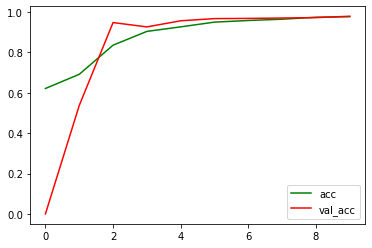

In [48]:
plt.plot(history_bc.epoch, history_bc.history['acc'], c='g', label='acc')
plt.plot(history_bc.epoch, history_bc.history['val_acc'], c='r', label='val_acc')
plt.legend()

# **price classification**

## over sampling for price

In [49]:
x_pc,y_pc=ros.fit_sample(x_data_good,y_data["price"])

In [50]:
x_pc.shape

(5352, 823)

In [51]:
y_pc.shape

(5352,)

## RNN model for price

In [52]:
def train_model_pc():
    model = keras.Sequential()
    model.add(layers.Embedding(max_word, 16, input_length=maxlen))
    model.add(layers.LSTM(16, dropout=0.2,
                         recurrent_dropout=0.5))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer=keras.optimizers.RMSprop(),
                 loss='binary_crossentropy',
                 metrics=['acc'])
    return model

In [53]:
model_pc = train_model_pc()

In [54]:
model_pc.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 823, 16)           305296    
_________________________________________________________________
lstm_2 (LSTM)                (None, 16)                2112      
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 307,425
Trainable params: 307,425
Non-trainable params: 0
_________________________________________________________________


In [55]:
history_pc = model_pc.fit(x_pc, y_pc, epochs=10, batch_size=128, validation_split=0.2)

Train on 4281 samples, validate on 1071 samples
Epoch 1/10
4281/4281 [==============================] - 45s 11ms/step - loss: 0.6699 - acc: 0.6232 - val_loss: 0.8617 - val_acc: 0.0000e+00
Epoch 2/10
4281/4281 [==============================] - 37s 9ms/step - loss: 0.6229 - acc: 0.6398 - val_loss: 0.7865 - val_acc: 0.2866
Epoch 3/10
4281/4281 [==============================] - 45s 11ms/step - loss: 0.5454 - acc: 0.7452 - val_loss: 0.6590 - val_acc: 0.5976
Epoch 4/10
4281/4281 [==============================] - 39s 9ms/step - loss: 0.4708 - acc: 0.8405 - val_loss: 0.4926 - val_acc: 0.8870
Epoch 5/10
4281/4281 [==============================] - 26s 6ms/step - loss: 0.3847 - acc: 0.8855 - val_loss: 0.3698 - val_acc: 0.9552
Epoch 6/10
4281/4281 [==============================] - 23s 5ms/step - loss: 0.3196 - acc: 0.9075 - val_loss: 0.2862 - val_acc: 0.9813
Epoch 7/10
4281/4281 [==============================] - 27s 6ms/step - loss: 0.2624 - acc: 0.9271 - val_loss: 0.1949 - val_acc: 1.0000
E

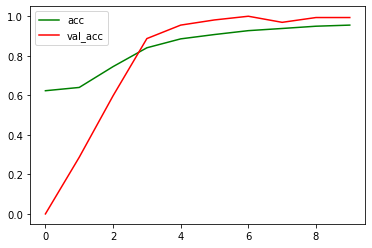

In [56]:
plt.plot(history_pc.epoch, history_pc.history['acc'], c='g', label='acc')
plt.plot(history_pc.epoch, history_pc.history['val_acc'], c='r', label='val_acc')
plt.legend()

# **regulation classification**

## over sampling for regulation

In [57]:
x_re,y_re=ros.fit_sample(x_data_good,y_data["regulation"])

In [58]:
x_re.shape

(4420, 823)

In [59]:
y_re.shape

(4420,)

## RNN model for regulation

In [60]:
def train_model_re():
    model = keras.Sequential()
    model.add(layers.Embedding(max_word, 32, input_length=maxlen))
    model.add(layers.LSTM(64, dropout=0.2,
                         recurrent_dropout=0.5))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer=keras.optimizers.RMSprop(),
                 loss='binary_crossentropy',
                 metrics=['acc'])
    return model

In [61]:
model_re = train_model_re()

In [62]:
model_re.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 823, 32)           610592    
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                24832     
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 635,489
Trainable params: 635,489
Non-trainable params: 0
_________________________________________________________________


In [63]:
history_re = model_re.fit(x_re, y_re, epochs=15, batch_size=128, validation_split=0.2)

Train on 3536 samples, validate on 884 samples
Epoch 1/15
3536/3536 [==============================] - 94s 27ms/step - loss: 0.6648 - acc: 0.6213 - val_loss: 0.8964 - val_acc: 0.0000e+00
Epoch 2/15
3536/3536 [==============================] - 60s 17ms/step - loss: 0.6136 - acc: 0.6448 - val_loss: 0.7822 - val_acc: 0.3247
Epoch 3/15
3536/3536 [==============================] - 67s 19ms/step - loss: 0.4928 - acc: 0.8218 - val_loss: 0.5678 - val_acc: 0.7839
Epoch 4/15
3536/3536 [==============================] - 83s 23ms/step - loss: 0.3876 - acc: 0.8682 - val_loss: 0.3110 - val_acc: 0.8880
Epoch 5/15
3536/3536 [==============================] - 47s 13ms/step - loss: 0.3125 - acc: 0.8971 - val_loss: 0.3475 - val_acc: 0.8541
Epoch 6/15
3536/3536 [==============================] - 65s 18ms/step - loss: 0.2563 - acc: 0.9186 - val_loss: 0.3060 - val_acc: 0.8778
Epoch 7/15
3536/3536 [==============================] - 90s 25ms/step - loss: 0.2042 - acc: 0.9367 - val_loss: 0.1385 - val_acc: 0.95

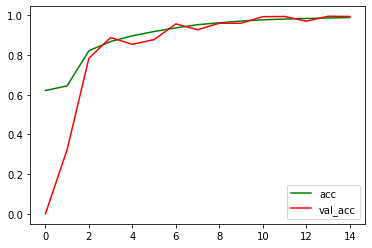

In [64]:
plt.plot(history_re.epoch, history_re.history['acc'], c='g', label='acc')
plt.plot(history_re.epoch, history_re.history['val_acc'], c='r', label='val_acc')
plt.legend()

In [65]:
model_bc.save("model_bc.h5")

In [66]:
model_pc.save("model_pc.h5")

In [67]:
model_re.save("model_re.h5")

In [69]:
def save_dict_to_file(_dict, filepath):
    try:
        with open(filepath, 'w') as dict_file:
            for (key,value) in _dict.items():
                dict_file.write('%s\t%s\n' % (key, value))
    except IOError as ioerr:
        print ("file %s can't be created" % (filepath))

def load_dict_from_file(filepath):
    _dict = {}
    try:
        with open(filepath, 'r') as dict_file:
            for line in dict_file:
                (key, value) = line.strip().split('\t')
                _dict[key] = value
    except IOError as ioerr:
        print ("file %s doesn't exist" % (filepath))
 
    return _dict

In [71]:
save_dict_to_file(word_index, "./word_index.txt")

In [74]:
keras.__version__


'2.1.5'